<a href="https://colab.research.google.com/github/lohit1632/Kriti_astro_lohit_hostel/blob/main/Kriti_Astronomy_PS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Analysing GW Data***

#1) Extracting the file data given and plotting the Gravitational Wave strain-time data

--2024-02-08 10:14:49--  https://raw.githubusercontent.com/SAURABH-RAI1729/KRITIGW/main/GW150914_strain_data_final.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 105506 (103K) [text/plain]
Saving to: ‘GW150914_strain_data_final.txt.1’

GW150914_strain_dat 100%[===================>] 103.03K  --.-KB/s    in 0.02s   

2024-02-08 10:14:49 (4.88 MB/s) - ‘GW150914_strain_data_final.txt.1’ saved [105506/105506]



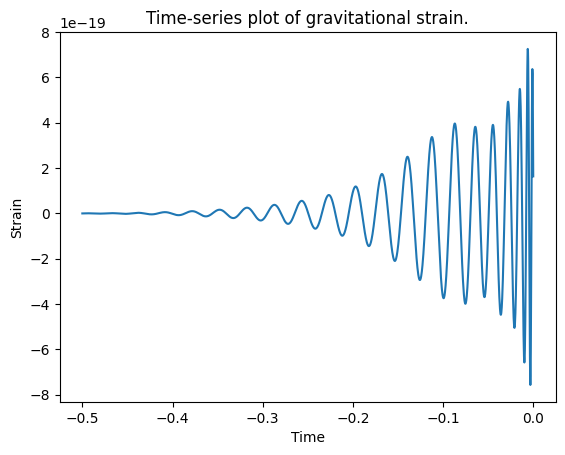

In [3]:
import matplotlib.pyplot as plt
import numpy as np
!wget https://raw.githubusercontent.com/SAURABH-RAI1729/KRITIGW/main/GW150914_strain_data_final.txt
#open the data file in read mode, store each line in a list and close file
file = open('GW150914_strain_data_final.txt', 'r')
data = file.readlines()
file.close()

#collect the x and y values by splitting the lines, converting the strings to float and appending them to lists
time = np.array([])
strain = np.array([])

for line in data:
    x, y = map(float, line.split())
    time = np.append(time, x)
    strain = np.append(strain,y)

#plot using matplotlib
plt.plot(time, strain, '-')
plt.xlabel('Time')
plt.ylabel('Strain')
plt.title('Time-series plot of gravitational strain.')
plt.show()

# 2) i) Explain Strain has Temporal Dependence

#*Explanation of the temporal dependence of Strain for GW150914*
##The merging event occurs in four phases, which is reflected by the different parts of the time series plot –
#*1)Inspiral:*
##During this phase, the gravitational waves emitted by the system have low frequencies and gradually increase in amplitude and frequency as the black holes spiral closer together. On the strain-time graph, the signal appears as a slowly increasing oscillation with a characteristic chirp pattern.
#*2)	Plunge phase:*
##As the bodies continue to spiral closer together, they eventually enter the plunge phase. On the strain-time graph, the signal experiences a rapid increase in amplitude and frequency, representing the intense gravitational waves emitted during the final moments before the merger.
#*3)	Merger phase:*
##This phase begins when the bodies finally collide and coalesce into a single body. This event generates an extremely energetic burst of gravitational waves. On the strain-time graph, the merger phase appears as a sharp spike in the signal, indicating the sudden and intense release of gravitational energy.
#*4)	Ringdown phase:*
##After the merger, the newly formed body undergoes a period of oscillation and relaxation as it settles. On the strain-time graph, the ringdown phase is characterized by a smooth, exponential decay in the gravitational wave signal after the merger phase (which is not detected in the data)


#2) ii) Does Frequency depend on time?

##The frequency also depends on time. It tends to increase exponentially as the merger event approaches. It reaches the maximum during Merger and then immediately gets stable at a low value during the ringdown phase.

#3) Algorithm used to estimate the frequency of each cycle

#*Algorithm:*
##1.Different cycles for calculating frequencies are done by calculating peaks time difference of the curve.
##2.Frequency in that interval = 1/(time interval of peaks)

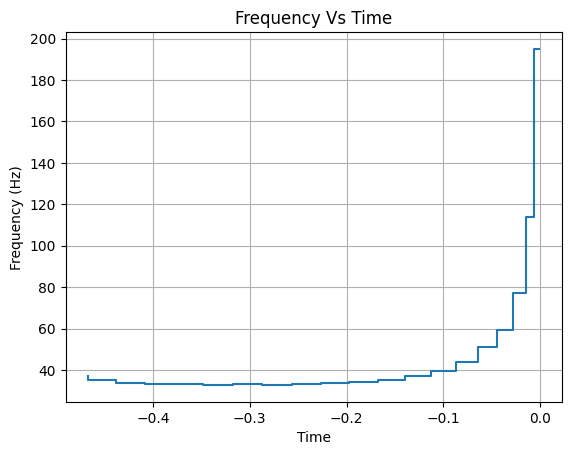

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks

#reading data
file = open('GW150914_strain_data_final.txt', 'r')
data = file.readlines()
file.close()

time = np.array([])
strain = np.array([])

for line in data:
    x, y = map(float, line.split())
    time = np.append(time, x)
    strain = np.append(strain, y)

#collecting the indexes of the peak strains in 'peeks'
peaks, _ = find_peaks(strain)
time_x=[]
for i in range(0,len(peaks)-1):
   time_x.append(time[peaks[i]])
time_diff=[]
for i in range(0,len(time_x)-1):
  time_diff.append(time_x[i+1]-time_x[i])
time_peaks = time[peaks]

# #using diff to collect time intervals between consecutive peaks
intervals = np.diff(time[peaks])

# frequency = 1/timePeriod
frequencies = 1/intervals
frequency=[]
for i in range(0,len(time_diff)):
  frequency.append(1/time_diff[i])
plt.step(time[peaks][1:],frequencies)
#starting from index 1 because number of intervals one less than number of peaks
plt.xlabel('Time')
plt.ylabel('Frequency (Hz)')
plt.title("Frequency Vs Time")
plt.grid()
plt.show()

# 4) Determing The chirp Mass from Frequency-Time Graph


##i)We can Curve fit the Frequency-Time Graph during the ispiral phase around (-0.14 sec to 0 sec).
##ii)We are fitting a logarithmic model into the curve.
##iii)Finally, We can find the the slope of the logarithmic Curve just when the Merger happens and then use the following formula to calculate the chirp mass

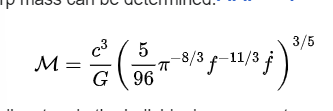

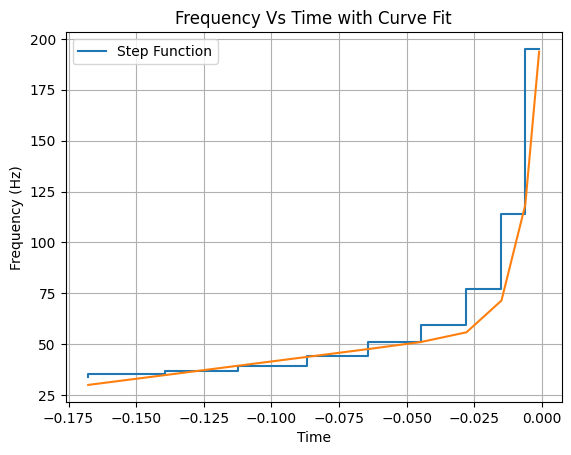

In [ ]:
from scipy.optimize import curve_fit
#Defining the exponential Model
def exp(x,a,b,c,d):
    return (a * (np.exp(b*x))) +c*x + d
def quadratic(t,a,b,c):
      return a * t**2 + b * t + c
inspiral_phase = -10
plt.step(time_peaks[inspiral_phase:], frequencies[inspiral_phase:], label='Step Function')
g = 6.67430*pow(10,-11)
c = 300000000
params,_ = curve_fit(exp, time_peaks[inspiral_phase:], frequencies[inspiral_phase:])
fitted_curve = exp(time_peaks[inspiral_phase:], *params)
plt.plot(time_peaks[inspiral_phase:],fitted_curve)
plt.xlabel('Time')
plt.ylabel('Frequency (Hz)')
plt.title("Frequency Vs Time with Curve Fit")
plt.legend()
plt.grid()
plt.show()

Finding the slope of the graph during merger and substituting in the formula

In [ ]:
import sympy as sp
import numpy as np
x = sp.symbols("x")
f = (params[0]*(sp.exp(params[1]*x))) +params[2]*x + params[3]
f_prime = sp.diff(f,x)
coalesce_time_index = np.argmax(strain)
coalesce_time = time[coalesce_time_index]
x_cord= coalesce_time #the time when merger happens
slope_at_x2 = f_prime.subs(x,x_cord) #slope at that time
freq = (params[0]*(sp.exp(params[1]*(x_cord/2)))) +params[2]*(x_cord/2) + params[3] #frequency at that time
const = 1.4890*pow(10,-8)
val=const*pow(freq,-11)*pow(slope_at_x2,3)
chirp_mass = (c**3)*pow(val,0.2)/g
solar_mass = 1.989*pow(10,30)
print("Our Estimated Chirp Mass: " + str(chirp_mass/solar_mass))

Our Estimated Chirp Mass: 20.3759267860131


#*5) i) Coalesce of Mass:*
##As the individual bodies in a binary system comes closer, the strain in gravity waves varies more. And according to strain vs time curve individual bodies will coalesce where the amplitude is highest.Surely, it will lie in merger region.

#*5) ii) Verifying the above statement:*
##We are verifying the above statement by making a (distance b/w two bodies) vs (time) plot.
##We will compare it with (strain amplitude) vs (time) plot. From these plots we will see when the distance b/w two bodies approaches 0 (1st plot) the strain amplitude will reach to its peak (2nd plot).

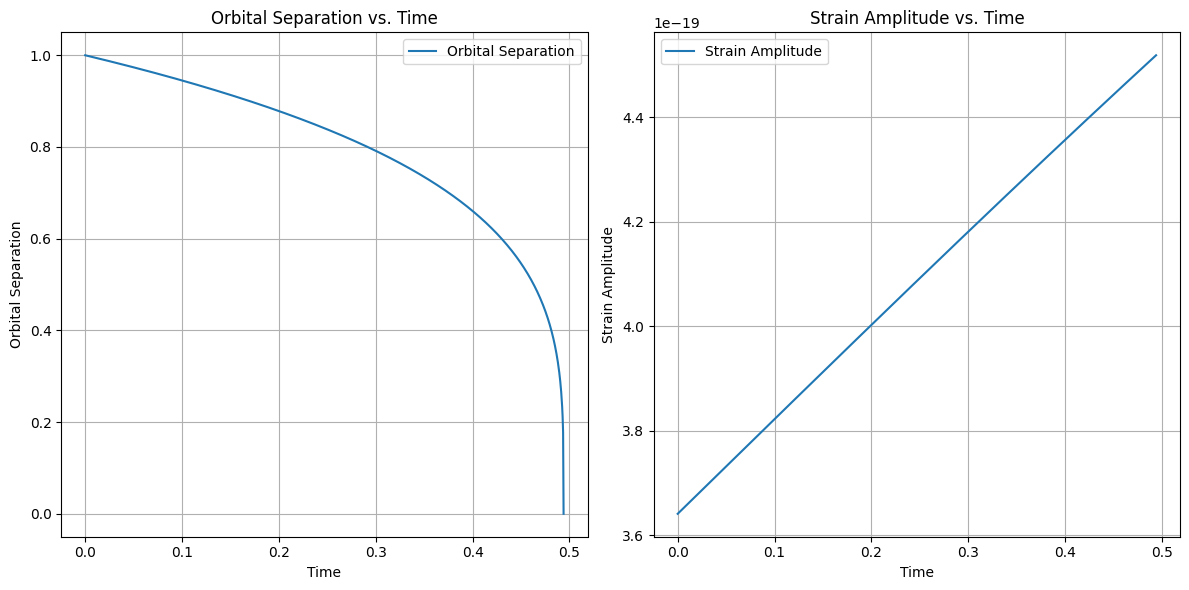

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate orbital separation as a function of time
def orbital_separation(t, r0, T_coalesce):
    return r0*(1-t/T_coalesce)**(1/4)

# Function to calculate strain amplitude as a function of time (simplified)
def strain_amplitude(t, amplitude_factor, coalescence_time):
    return amplitude_factor / (1 + np.exp(-(t - coalesce_time)))

# Set initial parameters
r0 = 1.0  # Initial orbital separation
T_coalesce = -(-0.5-coalesce_time)  # Coalescence time
amplitude_factor = strain[coalesce_time_index]#7.259311339647647e-19

# Generate time values
time_val = np.linspace(0, T_coalesce, 1000)

# Calculate orbital separation for each time value
orbital_separation_values = orbital_separation(time_val, r0, T_coalesce)

# Calculate strain amplitude for each time value (simplified)
strain_amplitude_values = strain_amplitude(time_val, amplitude_factor, T_coalesce)

# Plot the orbital separation and strain vs. time
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(time_val, orbital_separation_values, label='Orbital Separation')
plt.xlabel('Time')
plt.ylabel('Orbital Separation')
plt.title('Orbital Separation vs. Time')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(time_val, strain_amplitude_values, label='Strain Amplitude')
plt.xlabel('Time')
plt.ylabel('Strain Amplitude')
plt.title('Strain Amplitude vs. Time')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

#5) iii) Total Mass of the system:

##The Total mass of the system and chirp mass along with the reduced mass have the following relationship

## Also the simplified relation can be derived as follows from the following calculation based on the assumptions taken

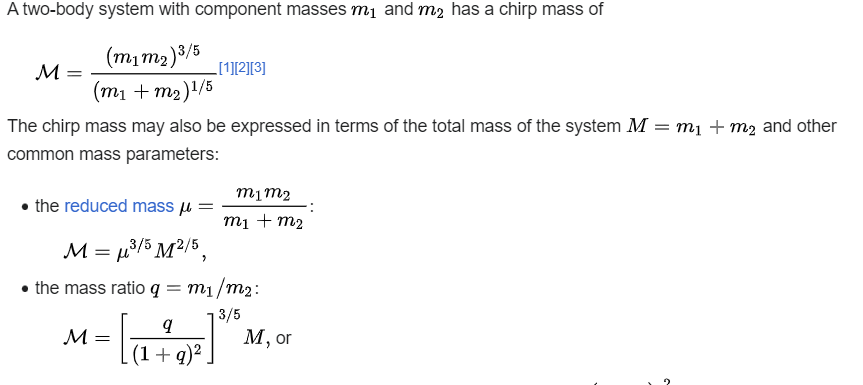![Screenshot 2024-02-04 230119.png](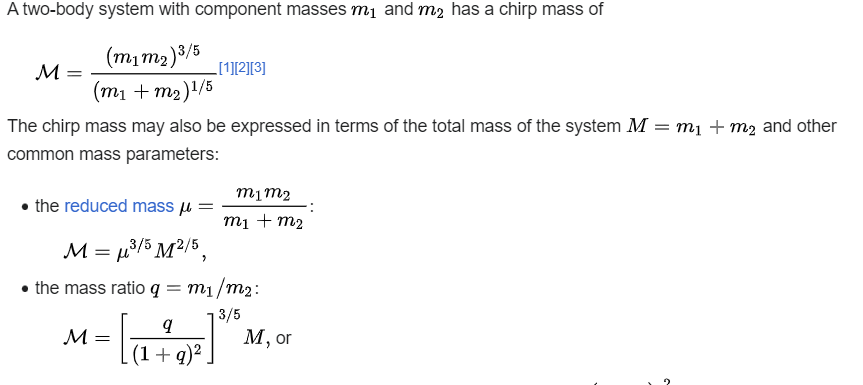![formual.jpg](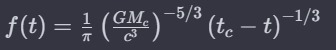![formual.jpg](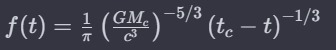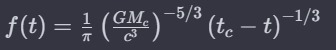)))

#The reduced mass ratio comes out to be 0.435, Thus chirp mass is 0.435 times total mass

In [ ]:
print("Total mass of the system " + str(chirp_mass/(0.435*solar_mass)))

Total mass of the system 46.8412110023291


#6) Estimating Individual Masses

##By Studying the spectrogram and the following formula we can calculate the chirp mass to be 20.37 Solar Masses

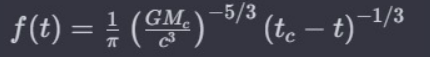

\

In [ ]:
import math
mass1 = (chirp_mass*(1+1)**(0.2))/((1)**(0.6))
mass2 = mass1*(1)
# total_mass = 10.0  # Replace with your actual total mass
# symmetric_mass_ratio = 0.2  # Replace with your actual symmetric mass ratio
print(mass1/solar_mass,mass2/solar_mass)

23.4057935806333 23.4057935806333


# ***Drawing Waveform from Parameter***

# 1) Generating Time-domain waveform

In [ ]:
import sys
!{sys.executable} -m pip install pycbc ligo-common --no-cache-dir

/usr/local/lib/python3.10/dist-packages/pycbc/types/array.py:36: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(True)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  import lal as _lal


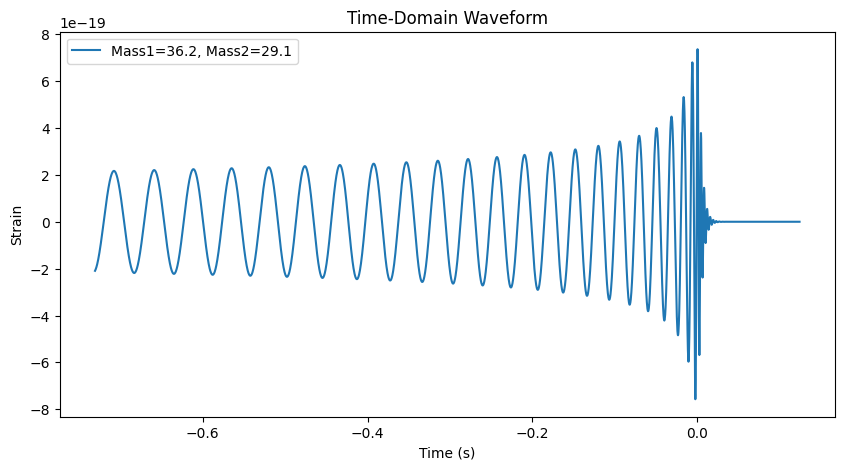

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from pycbc.waveform import get_td_waveform
from scipy.signal import find_peaks
# Function to generate and plot a time-domain waveform
def generate_and_plot_waveform(mass1, mass2):
    # Generate time-domain waveform
    waveform, _ = get_td_waveform(approximant='SEOBNRv4_opt',mass1=mass1, mass2=mass2,delta_t=1.0/4096, f_lower=20)
    peak_strain = max(np.abs(waveform))
# Plot the waveform
    plt.figure(figsize=(10, 5))
    plt.plot(waveform.sample_times, waveform, label=f'Mass1={mass1}, Mass2={mass2}')
    plt.xlabel('Time (s)')
    plt.ylabel('Strain')
    plt.title('Time-Domain Waveform')
    plt.legend()
    plt.show()

# Generate and plot waveforms for different masses
generate_and_plot_waveform(36.2,29.1)

# 2) Zoom in the plot near merger time

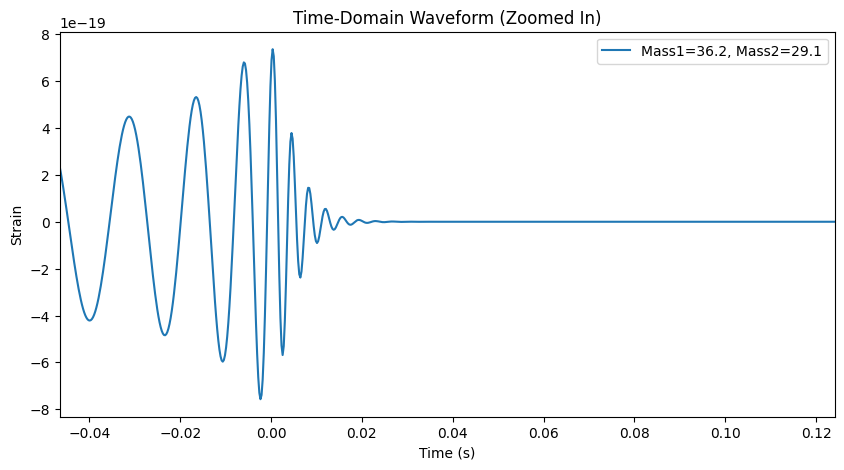

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from pycbc.waveform import get_td_waveform
from scipy.signal import find_peaks
# Function to generate and plot a time-domain waveform
def generate_and_plot_waveform(mass1, mass2):
    # Generate time-domain waveform
    waveform, _ = get_td_waveform(approximant='SEOBNRv4_opt',
                                   mass1=mass1, mass2=mass2,
                                   delta_t=1.0/4096, f_lower=20)
    peak_strain = max(np.abs(waveform))
    # Zoom in near the merger time
    plt.figure(figsize=(10, 5))
    plt.plot(waveform.sample_times, waveform, label=f'Mass1={mass1}, Mass2={mass2}')
    plt.xlabel('Time (s)')
    plt.ylabel('Strain')
    plt.title('Time-Domain Waveform (Zoomed In)')
    plt.xlim(waveform.sample_times[-700], waveform.sample_times[-1])
    plt.legend()
    plt.show()
# Generate and plot waveforms for different masses
generate_and_plot_waveform(36.2,29.1)

#3) Waveforms dependence on Individual Masses:
##   Keeping the mass ratio constant at 1.24 if we vary the individual masses we will get different chirp masses.
## We can Accordingly plot Waveform for different chirp masses and conclude that Waveform changes with individual masses.

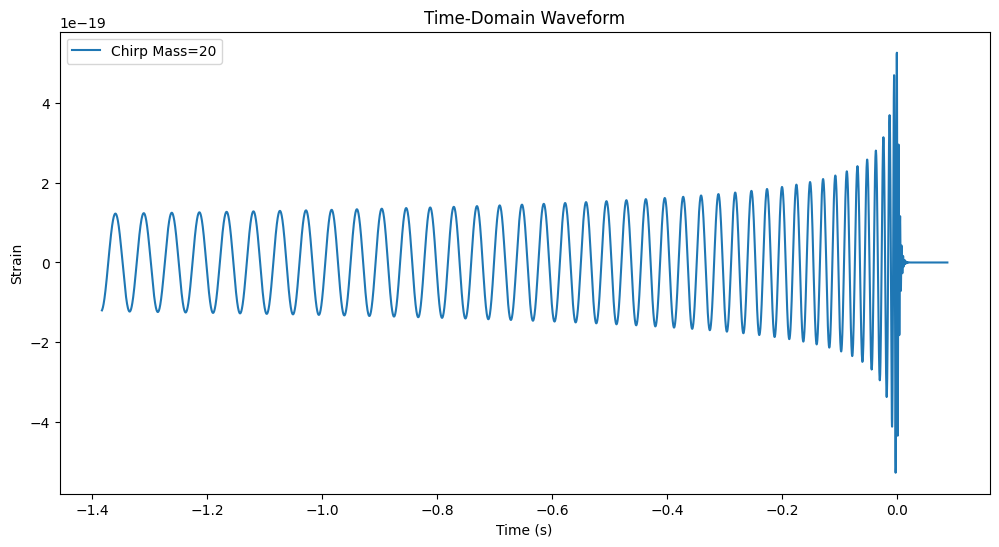

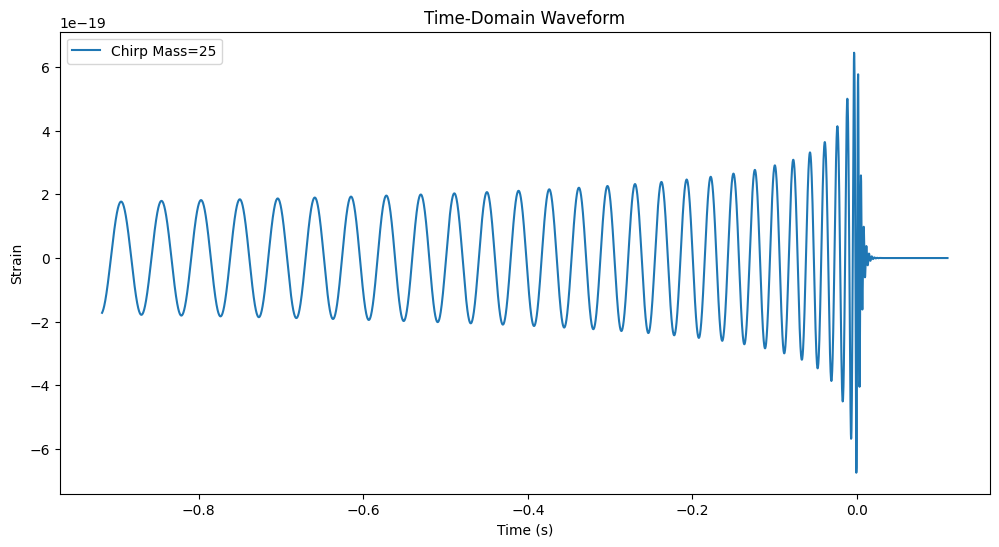

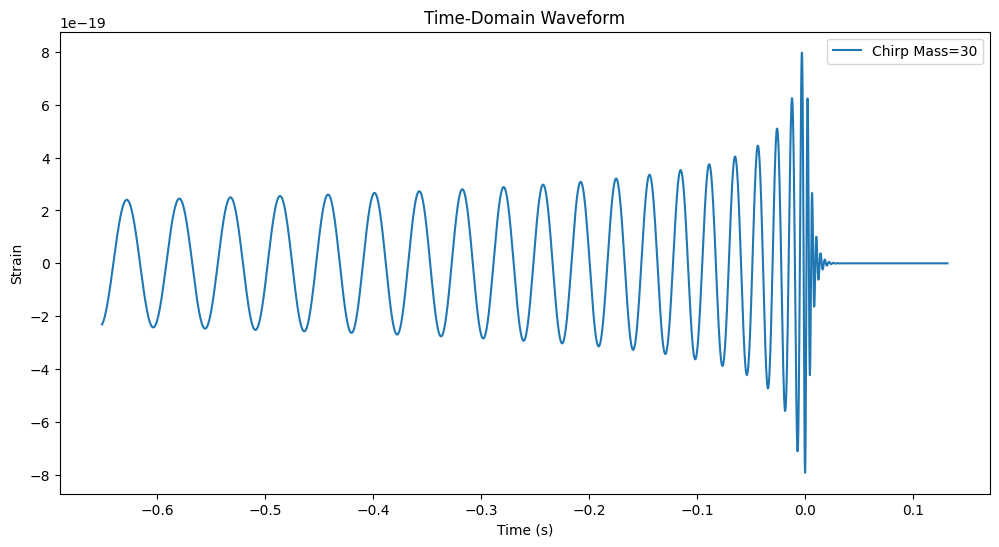

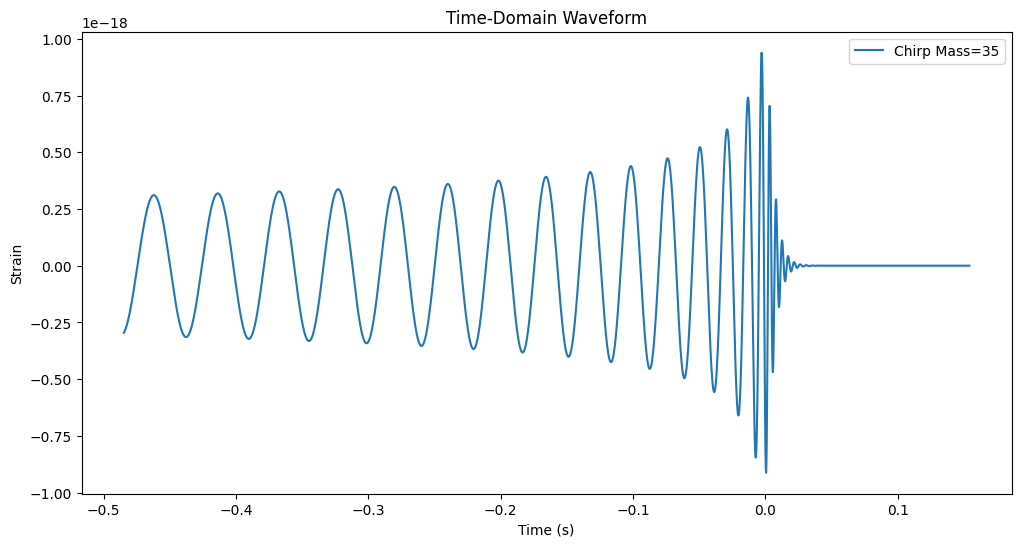

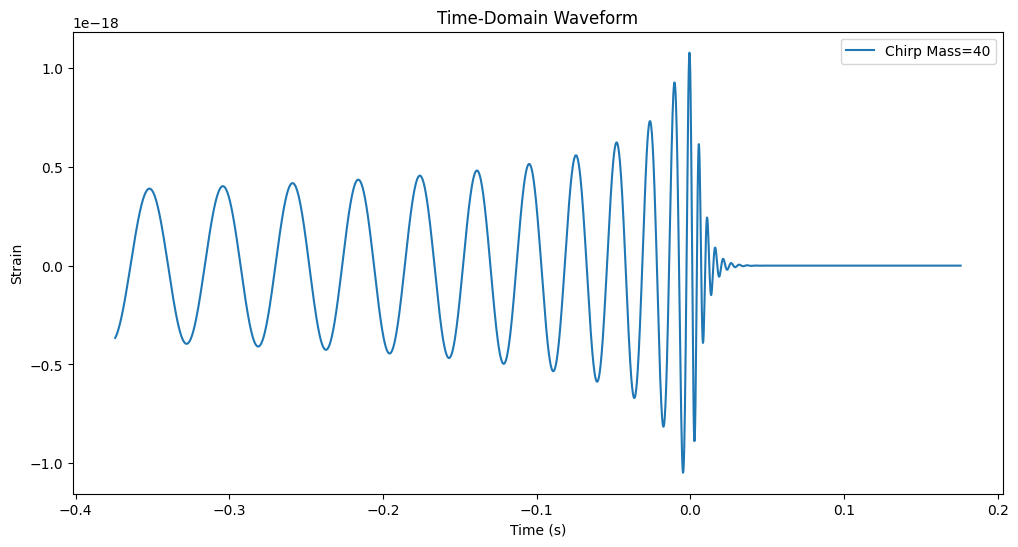

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from pycbc.waveform import get_td_waveform

# Function to generate and plot a time-domain waveform using chirp mass
def generate_and_plot_waveform(chirp_mass):
    # Assume symmetric mass ratio for simplicity (equal masses)
    mass_ratio = 36.2/29.1
    mass1 = (chirp_mass*(mass_ratio+1)**(0.2))/(mass_ratio**(0.6))
    mass2 = mass1*(mass_ratio)
    # Generate time-domain waveform
    waveform, _ = get_td_waveform(approximant='SEOBNRv4_opt',mass1=mass1, mass2=mass2,delta_t=1.0/4096, f_lower=20)

    # Plot the waveform
    plt.figure(figsize=(12, 6))
    plt.plot(waveform.sample_times, waveform, label=f'Chirp Mass={chirp_mass}')
    plt.xlabel('Time (s)')
    plt.ylabel('Strain')
    plt.title('Time-Domain Waveform')
    plt.legend()
    plt.show()
# Generate and plot waveforms for different chirp masses
for i in range(20,41,5):
  generate_and_plot_waveform(i)





# Finding a better Estimate for Chirp Mass:
##1) We will plot peak strain Vs Chirp Mass Graph and locate the chirp Mass where we get the peak strain corresponding to our event

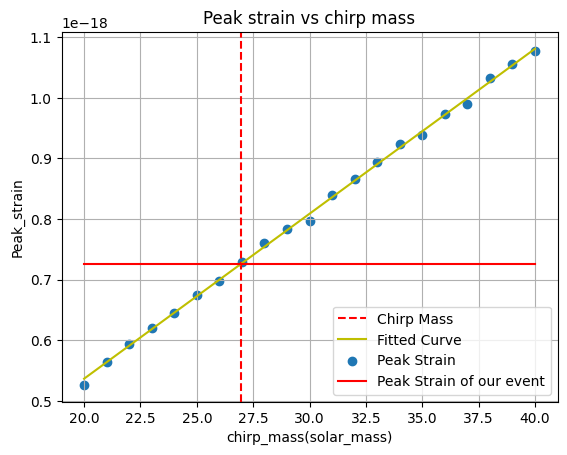

Better estimated Chirp Mass - 26.958396135699978


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from pycbc.waveform import get_td_waveform
from scipy.optimize import curve_fit

# Function to generate and plot a time-domain waveform using chirp mass
def generate_and_plot_waveform(chirp_mass):
    # Assume symmetric mass ratio for simplicity (equal masses)
    mass_ratio = 36.2 / 29.1
    mass1 = (chirp_mass * (mass_ratio + 1) ** (0.2)) / (mass_ratio ** (0.6))
    mass2 = mass1 * (mass_ratio)
    waveform, _ = get_td_waveform(approximant='SEOBNRv4_opt', mass1=mass1, mass2=mass2, delta_t=1.0 / 4096, f_lower=20)
    peak_strain = max(np.abs(waveform))
    return peak_strain

def linear(x, a, b):
    return x * a + b

xpoints = np.array(list(range(20, 41)))
ypoints = np.array([generate_and_plot_waveform(i) for i in xpoints])
arr = np.array([strain[coalesce_time_index] for _ in xpoints])
params2, _ = curve_fit(linear, xpoints, ypoints)
fitted_curve2 = linear(xpoints, *params2)
x_coordinate=((strain[coalesce_time_index]-params2[1])/params2[0])
plt.axvline(x=x_coordinate, color='red', linestyle='--', label='Chirp Mass')
plt.plot(xpoints, fitted_curve2, "y", label='Fitted Curve')
plt.scatter(xpoints, ypoints, label='Peak Strain')
plt.plot(xpoints, arr, '-r', label='Peak Strain of our event')
plt.title('Peak strain vs chirp mass')
plt.ylabel('Peak_strain')
plt.xlabel('chirp_mass(solar_mass)')
plt.legend()
plt.grid()
plt.show()
print("Better estimated Chirp Mass - "+str(x_coordinate))

#***Estimating the distance***

##3) To estimate the distance to the source ,we will use chirp mass from 6th part(fig 1) and peak_amplitude from waveform.

###Estimated distance = sqrt(k/peak_amplitude) ,where k=(calibration constant).

In [ ]:
import numpy as np
from pycbc.waveform import get_td_waveform

# Function to estimate distance to source from waveform amplitude
def estimate_distance_from_waveform(chirp_mass, amplitude):
    k = 1.0

    # Calculate distance
    distance = np.sqrt(k / amplitude)
    return distance

# Function to generate waveform and estimate distance
def generate_waveform_and_estimate_distance(chirp_mass):
    # Generate time-domain waveform
    waveform, _ = get_td_waveform(approximant='SEOBNRv4_opt',
                                   mass1=chirp_mass, mass2=chirp_mass,
                                   delta_t=1.0/4096, f_lower=20)

    # Calculate peak amplitude of the waveform
    peak_amplitude = max(np.abs(waveform))

    # Estimate distance to source
    distance = estimate_distance_from_waveform(chirp_mass, peak_amplitude)
    return distance

# Example: Estimate distance for a chirp mass of 30 solar masses
chirp_mass = 26.6
estimated_distance = generate_waveform_and_estimate_distance(chirp_mass)
print("Estimated distance to source:", estimated_distance, "light years")

Estimated distance to source: 1268353175.276258 light years

##From above relation we are getting estimated distance = 1.2e9 light years, which is very close to existing measurements(1.3e9 light years).